<a href="https://colab.research.google.com/github/tanvi0915/Transfer-Learning-on-VGG16-for-ASD-dataset/blob/main/Autism_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
IMAGE_SIZE = [512, 512]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

!ls '/content/drive'


MyDrive  Shareddrives


In [ ]:
#Give dataset path
train_path = '/content/drive/MyDrive/autismdataset/train'
test_path = '/content/drive/MyDrive/autismdataset/test'

In [ ]:
#to look at the images in drive
from PIL import Image 
import os 
from IPython.display import display
from IPython.display import Image as _Imgdis
  

Working with 1317 images
Image examples: 
0023.jpg


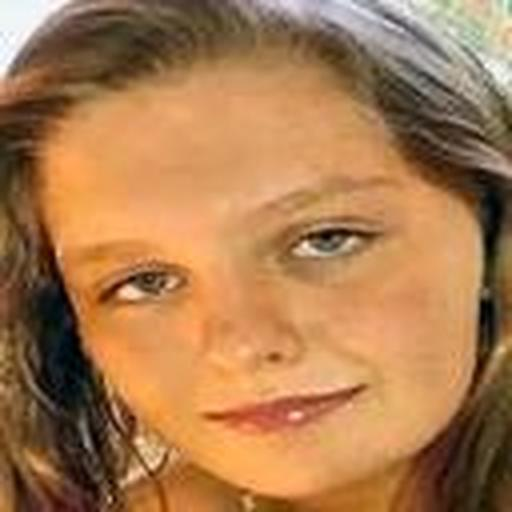

0027.jpg


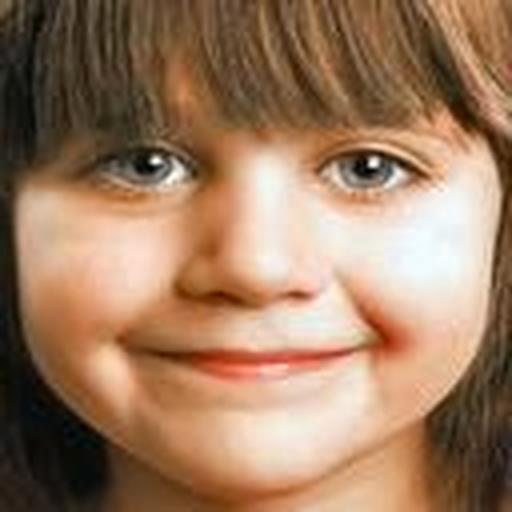

0025.jpg


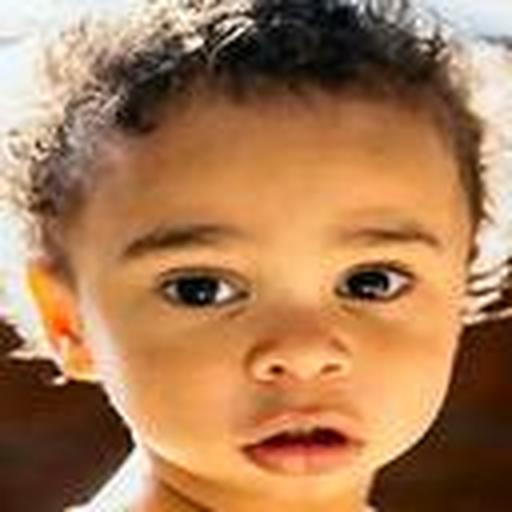

0022.jpg


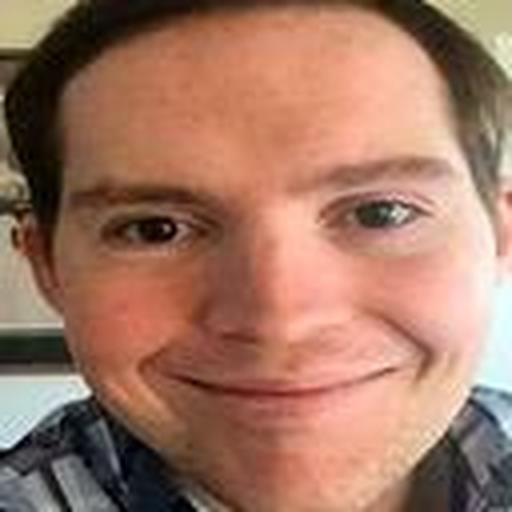

0021.jpg


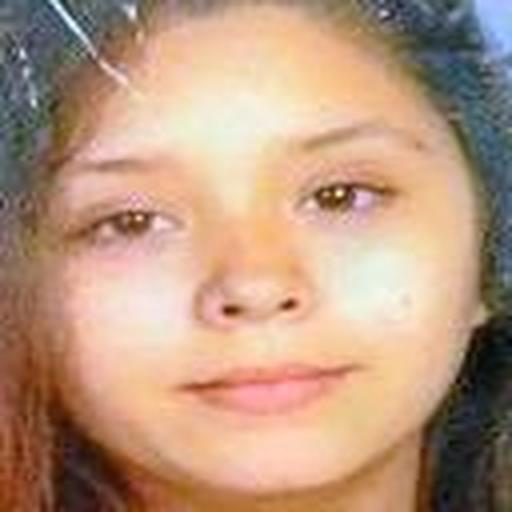

0020.jpg


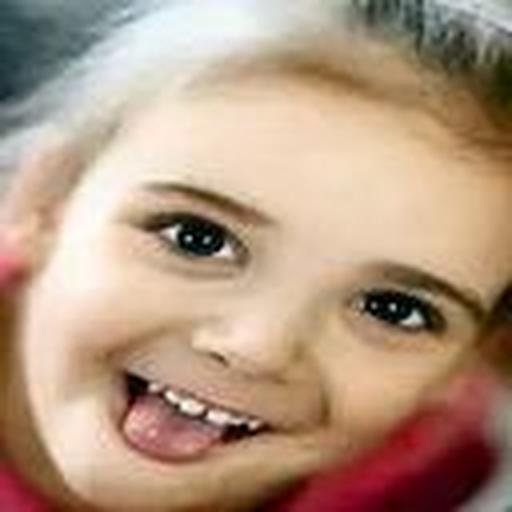

0018.jpg


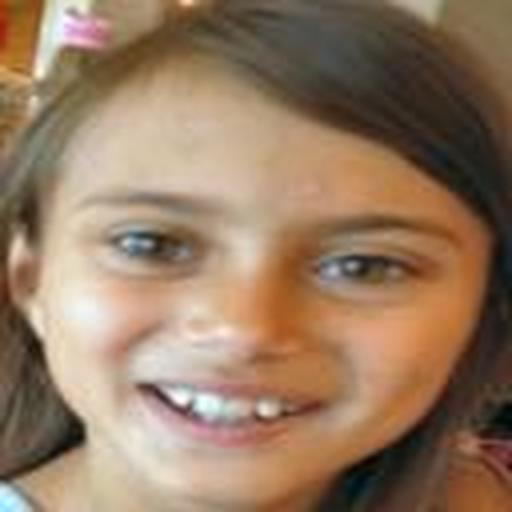

0019.jpg


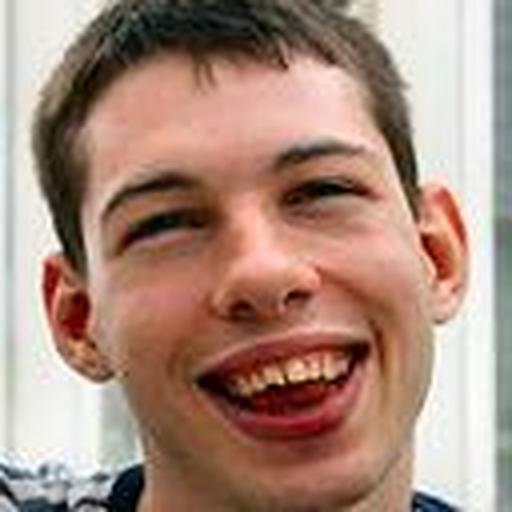

0024.jpg


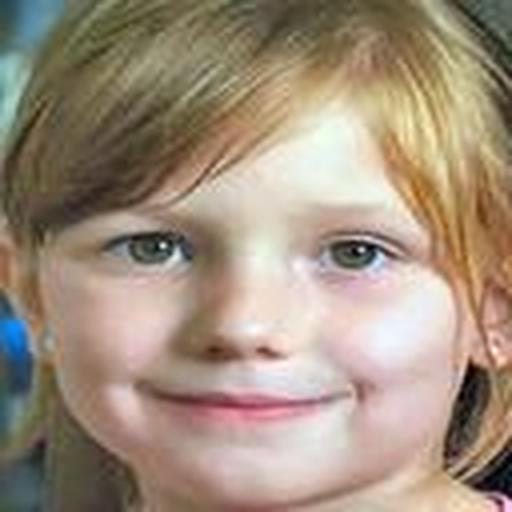

0016.jpg


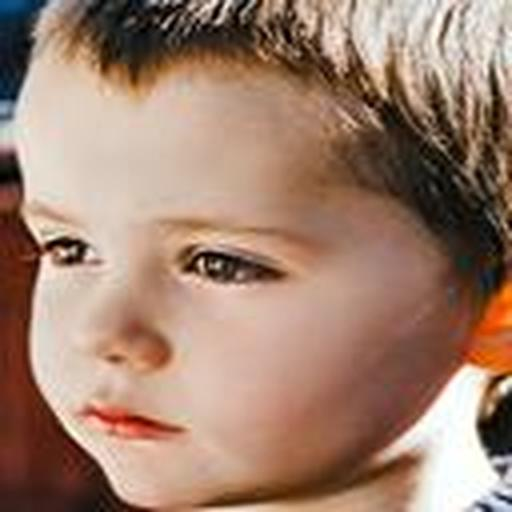

In [ ]:
# creating a object  

  
folder = train_path+'/autistic'


onlyautismfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlyautismfiles)))
print("Image examples: ")


for i in range(10):
    print(onlyautismfiles[i])
    display(_Imgdis(filename=folder + "/" + onlyautismfiles[i], width=128, height=128))

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [ ]:
vgg.input

<KerasTensor: shape=(None, 512, 512, 3) dtype=float32 (created by layer 'input_4')>

In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
#no. of folders in train
folders = glob('/content/drive/MyDrive/autismdataset/train/*')
print(len(folders))

2


In [ ]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 512, 512, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 512, 512, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 512, 512, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 256, 256, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 256, 256, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 256, 256, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 128, 128, 128)     0   

In [ ]:
#using adam optimizer
from keras import optimizers


adam = tf.keras.optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (512, 512),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2643 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (512, 512),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 280 images belonging to 2 classes.


In [65]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='mymodel.h5', 
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=5,
  validation_steps=32,
    callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
5/5 - 1055s - loss: 10.3649 - accuracy: 0.5375 - val_loss: 10.4004 - val_accuracy: 0.6571

Epoch 00001: val_loss improved from inf to 10.40036, saving model to mymodel.h5
Epoch 2/10
5/5 - 386s - loss: 10.9044 - accuracy: 0.6062
Epoch 3/10
5/5 - 386s - loss: 9.8415 - accuracy: 0.5875
Epoch 4/10
5/5 - 383s - loss: 8.2294 - accuracy: 0.6562
Epoch 5/10
5/5 - 381s - loss: 6.2983 - accuracy: 0.7063
Epoch 6/10
5/5 - 379s - loss: 8.1440 - accuracy: 0.6812
Epoch 7/10
5/5 - 379s - loss: 6.5755 - accuracy: 0.7000
Epoch 8/10
5/5 - 377s - loss: 9.0145 - accuracy: 0.6438
Epoch 9/10
5/5 - 381s - loss: 9.0407 - accuracy: 0.6250
Epoch 10/10
5/5 - 378s - loss: 7.3779 - accuracy: 0.6750
Training completed in time:  1:17:44.344982


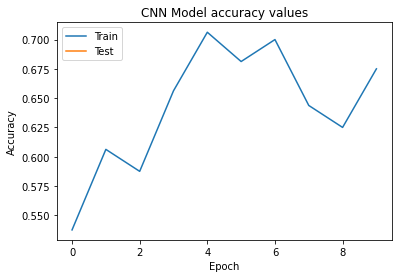

In [66]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()